## Exercise 03.01: Scikit Learn, Interpretable Machine Learning


Part 1: Learn about Scikit Learn (Machine Learning in Python, e.g.
* https://scikit-learn.org/stable/tutorial/index.html
* Video: http://videolectures.net/icml2010_varaquaux_scik/
* Another alternative (*): https://www.youtube.com/watch?v=0Lt9w-BxKFQ

Part 2: Learn about feature importance and SHAP
* https://towardsdatascience.com/interpretable-machine-learning-models-aef0c7be3fd9
* https://shap.readthedocs.io/en/latest/index.html
* Video: https://www.youtube.com/watch?v=GzEgxFtHH4w

Part 3: Apply Scikit Learn & SHAP
* Use the heart disease dataset: https://www.kaggle.com/ronitf/heart-disease-uci
* Apply preprocessing on the data as needed, see the (*) video, also provide some overview/visualization of the features 
* Build models using logistic regression, decision trees (C4.5), random forest, neural networks and evaluate them (accuracy, ROC/AUC)
* For the evaluation, you can print some tables or use plots
* Which are the important features of the model(s)? Use feature importance for the tree-based models. Are there any differences there?
* Apply SHAP on all the models, and provide a view on the important features and their impact
* Discuss (write some text!) about which model works best, and which is "most interpretable".

In [1]:
import numpy as np
import pandas as pd

#required packages
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

# ... add here

#Loading dataset
heartData = pd.read_csv('./heart.csv',sep=',')
heartDataDiscretised = pd.read_csv('./heart.csv',sep=',')
#heartDataForPlots = pd.read_csv('./heart.csv',sep=',')

#heartData.head()
#heartData.info()
#heartData.isnull().sum()

#preprocessing Data


In [2]:
heartData.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


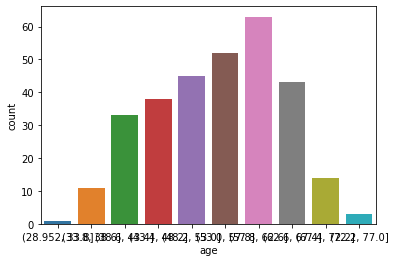

In [3]:
#preprocessing
bins = 2
group_names = ['no_diagnosis','diagnosis']
heartData['target'] = pd.cut(heartData['target'], bins = bins, labels = group_names)
heartData['target'].unique()
label_sex = LabelEncoder()
heartData['target'] = label_sex.fit_transform(heartData['target'])

bins = 10
heartDataDiscretised['age'] = pd.cut(heartDataDiscretised['age'], bins = bins)
#heartDataDiscretised['age'].unique()
#label_age = LabelEncoder()
#heartDataDiscretised['age'] = label_age.fit_transform(heartDataDiscretised['age'])

plt.show(sns.countplot(x = heartDataDiscretised['age']))

In [4]:
#Feature Overwview
heartData.head(10)
#heartData.isnull().sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,0


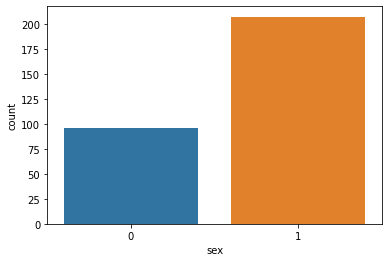

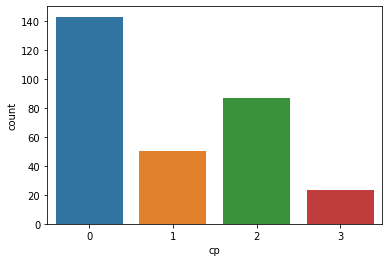

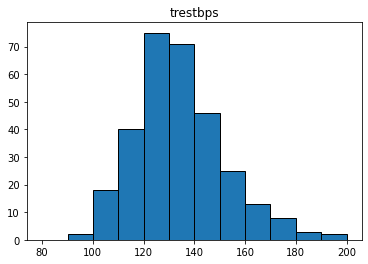

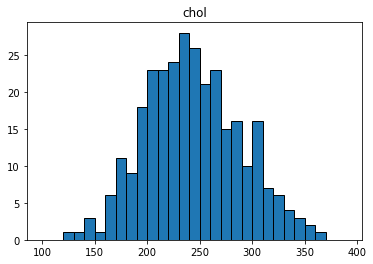

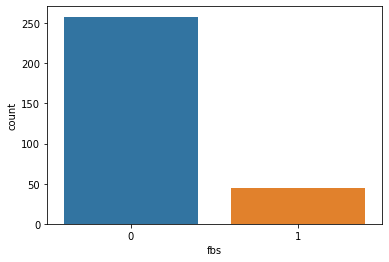

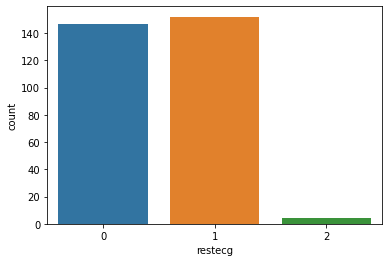

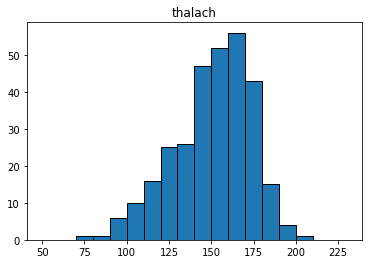

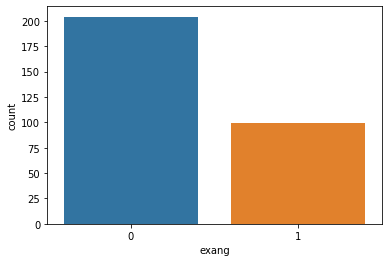

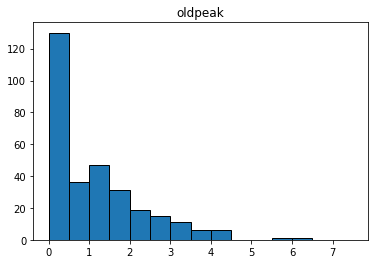

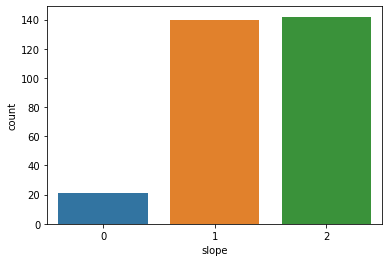

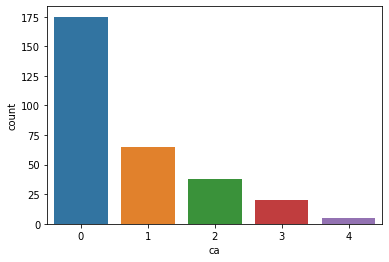

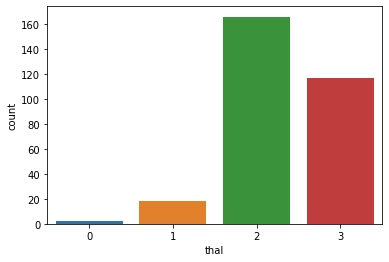

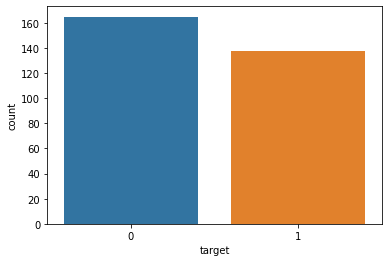

In [5]:
#Feature Visualization
#plt.show(sns.countplot(x = heartData['age']))
#hist, edges = np.histogram(heartData['age'], bins=np.arange(0,101,10))
#plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
#plt.title('age')
#plt.show()

plt.show(sns.countplot(x = heartData['sex']))
plt.show(sns.countplot(x = heartData['cp']))
#plt.show(sns.countplot(x = heartData['trestbps']))
hist, edges = np.histogram(heartData['trestbps'], bins=np.arange(80,201,10))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.title('trestbps')
plt.show()

#plt.show(sns.countplot(x = heartData['chol']))
hist, edges = np.histogram(heartData['chol'], bins=np.arange(100,400,10))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.title('chol')
plt.show()

plt.show(sns.countplot(x = heartData['fbs']))
plt.show(sns.countplot(x = heartData['restecg']))
#plt.show(sns.countplot(x = heartData['thalach']))
hist, edges = np.histogram(heartData['thalach'], bins=np.arange(50,240,10))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.title('thalach')
plt.show()

plt.show(sns.countplot(x = heartData['exang']))
#plt.show(sns.countplot(x = heartData['oldpeak']))
hist, edges = np.histogram(heartData['oldpeak'], bins=np.arange(0,8,0.5))
plt.bar(edges[:-1], hist, align="edge", ec="k", width=np.diff(edges))
plt.title('oldpeak')
plt.show()

plt.show(sns.countplot(x = heartData['slope']))
plt.show(sns.countplot(x = heartData['ca']))
plt.show(sns.countplot(x = heartData['thal']))
plt.show(sns.countplot(x = heartData['target']))

# Random Forest

In [6]:
#separate features and response variable
X = heartData.drop('target', axis = 1) #all features without target
y = heartData['target']

#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)

#standardscaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
#Apply random forest model
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [8]:
#look at performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
cm = accuracy_score(y_test, pred_rfc)
print('Accuracy Score Random Forest:  ' + str(cm))
roc = roc_auc_score(y_test, pred_rfc, average=None)
print('ROC/AUC Score Random Forest:  ' + str(roc))

Accuracy Score Random Forest:  0.8360655737704918
ROC/AUC Score Random Forest:  0.834051724137931


In [9]:
modelnames = [None] * 4
cml = [None] * 4
rocl = [None] * 4

modelnames[0] = "rf"
cml[0] = cm
rocl[0]= roc

# SVM Classifier

In [10]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [11]:
#look at performance 
cm = accuracy_score(y_test, pred_clf)
print('Accuracy Score SVM:  ' + str(cm))
roc = roc_auc_score(y_test, pred_clf, average=None)
print('ROC/AUC Score SVM:  ' + str(roc))

Accuracy Score SVM:  0.8688524590163934
ROC/AUC Score SVM:  0.8669181034482759


# Neural Network

In [12]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [13]:
#look at performance 
cm = accuracy_score(y_test, pred_mlpc)
print('Accuracy Score NN:  ' + str(cm))
roc = roc_auc_score(y_test, pred_mlpc, average=None)
print('ROC/AUC Score NN:  ' + str(roc))

Accuracy Score NN:  0.8524590163934426
ROC/AUC Score NN:  0.8529094827586207


In [14]:
modelnames[1] = "nn"
cml[1] = cm
rocl[1]= roc

# Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [16]:
#look at performance 
cm = accuracy_score(y_test, pred_dtc)
print('Accuracy Score Decision Trees:  ' + str(cm))
roc = roc_auc_score(y_test, pred_dtc, average=None)
print('ROC/AUC Score Decision Trees:  ' + str(roc))

Accuracy Score Decision Trees:  0.7868852459016393
ROC/AUC Score Decision Trees:  0.7904094827586207


In [17]:
modelnames[2] = "dt"
cml[2] = cm
rocl[2]= roc

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_lgr = lgr.predict(X_test)

In [19]:
#look at performance 
cm = accuracy_score(y_test, pred_lgr)
print('Accuracy Score NN:  ' + str(cm))
roc = roc_auc_score(y_test, pred_lgr, average=None)
print('ROC/AUC Score NN:  ' + str(roc))

Accuracy Score NN:  0.8852459016393442
ROC/AUC Score NN:  0.8841594827586207


In [20]:
modelnames[3] = "lr"
cml[3] = cm
rocl[3]= roc

# Plots For Comparison

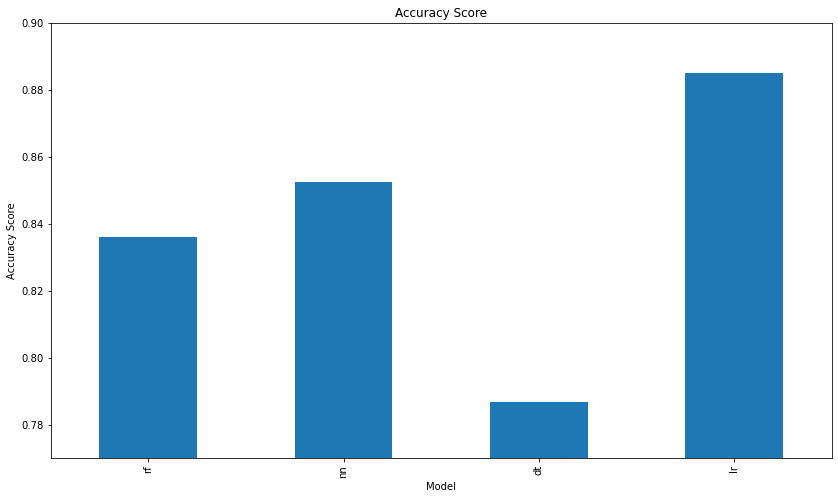

In [21]:
# Plot the Accuracy Score

plt.figure(figsize=(14, 8))
ax = pd.Series(cml).plot(kind="bar")
ax.set_title("Accuracy Score")
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy Score")
ax.set_xticklabels(modelnames)
plt.ylim(0.77, 0.9)

plt.show()

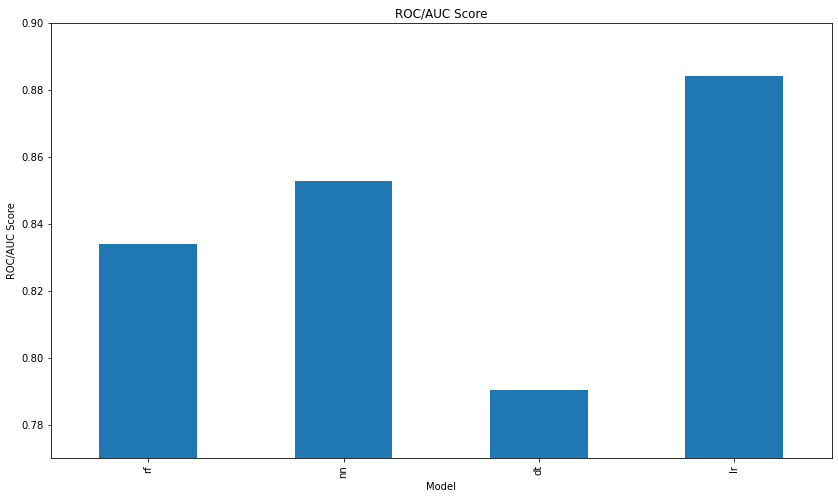

In [22]:
# Plot the ROCAUC

plt.figure(figsize=(14, 8))
ax = pd.Series(rocl).plot(kind="bar")
ax.set_title("ROC/AUC Score")
ax.set_xlabel("Model")
ax.set_ylabel("ROC/AUC Score")
ax.set_xticklabels(modelnames)
plt.ylim(0.77, 0.9)

plt.show()

In [25]:
import shap

# DF, based on which importance is checked
X_importance = X_test
X_importance2 = X_test

# Explain model predictions for decision trees using shap library:
explainer_dtc = shap.TreeExplainer(dtc)
shap_values = explainer_dtc.shap_values(X_importance)

#random forest 
explainer_rfc = shap.TreeExplainer(rfc.fit(X_train, y_train))
shap_values2 = explainer_rfc.shap_values(X_importance2)

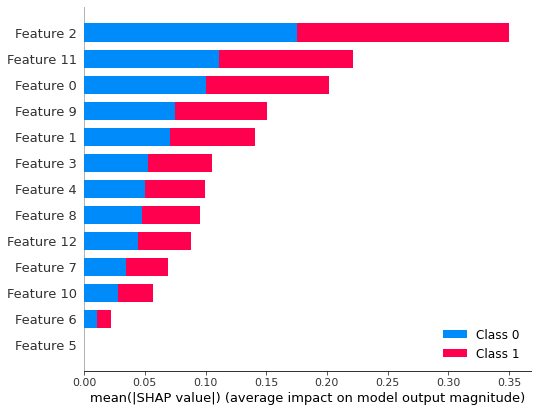

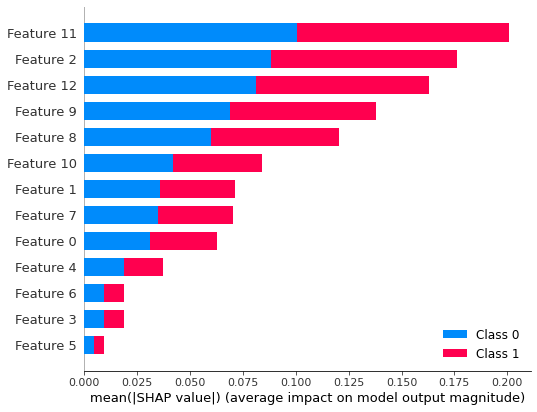

In [27]:
# Plot summary_plot for dt as barplot:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

# Plot summary_plot for rfc as barplot:
shap.summary_plot(shap_values2, X_importance2, plot_type='bar')

## Exercise 03.02: Reading/Discussion/Summary

Part 1: Reading:
* Read the following paper: Rudin (2019) "Stop explaining black box machine learning models for high stakes decisions and use interpretable models instead"
* The paper is available here: https://www.nature.com/articles/s42256-019-0048-x

Part 2: Think about the following questions:
* What is Explainable Machine Learning?
* What are the features of Interpretable Machine Learning?
* Why and when do we need both?
* Are there any disadvantages?
* What are specific challenges in their application?
* Can, and if so, how, explainable and interpretable ML be implemented efficiently?
* What are some exemplary techniques to apply?

Part 3: Discussing, Summary
* Prepare answers for these questions for the practical session on November 16, 2021. You will first discuss these in groups, and then we will discuss them in the plenary meeting.
* After that, summarize your findings (and those of the group discussion) in a small report (max. half a Din A4 page). For example, you could write 2-3 sentences for answering a specific question.

## Report
Explainable machine Learning consists of two diffrent models. The first one is a black box, that ist just to complicated for humans to understand. The second one replicates most of the features of the original model, but represents the output in a way that makes it possible for humans to understand.

Interpretable machine learning on the other hand is inherently explainable. Instead of an translation from the original model it is possible to just follow its reasoning.

If you plan to develop a machine learning model for high-stakes decisions, for the final product an interpretable machine learning model should be used because the explanation of a explainable model may leaves out
so much information that its decision makes no sense. A explainable machine Learning model still could be used for knowledge discovery.

Interpretable models require significant effort to construct and are less attractive for companys due to their transparency. Black box models on the other hand can lead to false assumtions on the reasoning of the model. This can have a big impact if it is needed for humans to understand the decision.

A challenge of interpretable models is, that interpretability is not always clearly defined, for example in computer vision. Also the construction of optimal interpretable models can be computational hard, so good optimization methods need to be found.

These computational problems can be solved by leveraging a combination of theoretical and systems-level tech-
niques. Logical Models can be accelerated by using special datastructures, search space reduction and fast exploration of search space. Interpretable neural networks are generally harder than normal neural networks tho and more research needs to be conducted.

Some exemplary techniques to solves these computational hard problems is for example the CORELS algorithm
it solves the minimization problem for computing a logical model. RiskSLIM is another technique to solve another type of minimization. It solves it using cutting planes for setting coefficients of a scoring system.

## Uploading your solution
For uploading your solution, please upload two files:
* The Jupyter-Notebook file (.ipynb)
* A PDF (printout/file) of the Jupyter notebook file (.pdf)